DOWNLOADING DATASET

In [6]:
! unzip /content/archivee.zip

Archive:  /content/archivee.zip
replace Symptom-severity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Symptom-severity.csv    
replace Training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Training.csv            
replace description.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: description.csv         
replace diets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diets.csv               
replace medications.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: medications.csv         
replace precautions_df.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: precautions_df.csv      
replace symtoms_df.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: symtoms_df.csv          
replace workout_df.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: workout_df.csv          


READING CSV FILES

In [7]:
import pandas as pd
df_symptom_severity=pd.read_csv('Symptom-severity.csv')
import pandas as pd
df_symptom_severity=pd.read_csv('Symptom-severity.csv')
print(df_symptom_severity.head())
print(df_symptom_severity.shape)
print(df_symptom_severity.columns)
print(df_symptom_severity.isnull().sum())
print(df_symptom_severity.duplicated().sum())


                Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5
(133, 2)
Index(['Symptom', 'weight'], dtype='object')
Symptom    0
weight     0
dtype: int64
0


In [8]:
df_description=pd.read_csv('description.csv')
print(df_description.head())
print(df_description.shape)


               Disease                                        Description
0     Fungal infection  Fungal infection is a common skin condition ca...
1              Allergy  Allergy is an immune system reaction to a subs...
2                 GERD  GERD (Gastroesophageal Reflux Disease) is a di...
3  Chronic cholestasis  Chronic cholestasis is a condition where bile ...
4        Drug Reaction  Drug Reaction occurs when the body reacts adve...
(41, 2)


In [9]:
df_diets=pd.read_csv('diets.csv')
print(df_diets.head())
print(df_diets.shape)


               Disease                                               Diet
0     Fungal infection  ['Antifungal Diet', 'Probiotics', 'Garlic', 'C...
1              Allergy  ['Elimination Diet', 'Omega-3-rich foods', 'Vi...
2                 GERD  ['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'...
3  Chronic cholestasis  ['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot...
4        Drug Reaction  ['Antihistamine Diet', 'Omega-3-rich foods', '...
(41, 2)


In [10]:
df_medications=pd.read_csv('medications.csv')
print(df_medications.head())
s=df_medications.shape
print(s)

               Disease                                         Medication
0     Fungal infection  ['Antifungal Cream', 'Fluconazole', 'Terbinafi...
1              Allergy  ['Antihistamines', 'Decongestants', 'Epinephri...
2                 GERD  ['Proton Pump Inhibitors (PPIs)', 'H2 Blockers...
3  Chronic cholestasis  ['Ursodeoxycholic acid', 'Cholestyramine', 'Me...
4        Drug Reaction  ['Antihistamines', 'Epinephrine', 'Corticoster...
(41, 2)


CLEANING AND MANIPULATING DATA

In [11]:
import pandas as pd
df=pd.DataFrame({"Disease":df_description.Disease[:],"description":df_description.Description[:],"medication":df_medications.Medication[:],"diet":df_diets.Diet[:]})

print(df.shape)
print(df.columns)


(41, 4)
Index(['Disease', 'description', 'medication', 'diet'], dtype='object')


In [12]:
df_precautions=pd.read_csv('precautions_df.csv')
print(df_precautions.head())
print(df_precautions.shape)
df_precautions.duplicated().sum()



   Unnamed: 0         Disease                      Precaution_1  \
0           0   Drug Reaction                   stop irritation   
1           1         Malaria          Consult nearest hospital   
2           2         Allergy                    apply calamine   
3           3  Hypothyroidism                     reduce stress   
4           4       Psoriasis  wash hands with warm soapy water   

                   Precaution_2        Precaution_3  \
0      consult nearest hospital    stop taking drug   
1               avoid oily food  avoid non veg food   
2       cover area with bandage                 NaN   
3                      exercise         eat healthy   
4  stop bleeding using pressure      consult doctor   

                  Precaution_4  
0                    follow up  
1           keep mosquitos out  
2  use ice to compress itching  
3             get proper sleep  
4                   salt baths  
(41, 6)


np.int64(0)

In [13]:
common_diseases = set(df_precautions['Disease']).intersection(set(df['Disease']))

print("Common diseases in both tables:")
print(common_diseases)
print(len(common_diseases))

Common diseases in both tables:
{'Dimorphic hemmorhoids(piles)', 'Cervical spondylosis', 'Hepatitis D', 'Hypoglycemia', 'Typhoid', 'Chicken pox', 'Drug Reaction', 'Dengue', 'Impetigo', 'Fungal infection', 'Arthritis', 'Hepatitis B', 'Heart attack', 'Osteoarthristis', 'Alcoholic hepatitis', 'Acne', 'Hypothyroidism', 'Hepatitis C', 'Migraine', 'Common Cold', 'Psoriasis', 'Urinary tract infection', 'AIDS', 'Jaundice', 'hepatitis A', 'Tuberculosis', 'Bronchial Asthma', 'Allergy', 'Pneumonia', 'Paralysis (brain hemorrhage)', 'Chronic cholestasis', 'Gastroenteritis', 'Hepatitis E', 'Malaria', 'Hyperthyroidism', 'GERD', 'Varicose veins'}
37


In [14]:
merged_data=pd.merge(df,df_precautions,on='Disease',how='left')
merged_data.fillna("NA", inplace=True)
print(merged_data.shape)

merged_data.drop(columns=['Unnamed: 0'], inplace=True)

print(merged_data.columns)
print(merged_data.shape)

print(merged_data.Precaution_1[1])

(41, 9)
Index(['Disease', 'description', 'medication', 'diet', 'Precaution_1',
       'Precaution_2', 'Precaution_3', 'Precaution_4'],
      dtype='object')
(41, 8)
apply calamine


<ipython-input-14-5ee0fcd36382>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_data.fillna("NA", inplace=True)


In [15]:
workouts=pd.read_csv('workout_df.csv')
print(workouts.head())
print(workouts.shape)

   Unnamed: 0.1  Unnamed: 0           disease                    workout
0             0           0  Fungal infection         Avoid sugary foods
1             1           1  Fungal infection         Consume probiotics
2             2           2  Fungal infection  Increase intake of garlic
3             3           3  Fungal infection     Include yogurt in diet
4             4           4  Fungal infection      Limit processed foods
(410, 4)


In [16]:
# Group workout advice by disease and create separate columns
# Group workout advice by disease
df_workout_grouped = workouts.groupby('disease')['workout'].apply(lambda x: ', '.join(x)).reset_index()

# Rename columns for clarity
df_workout_grouped.columns = ['Disease', 'Grouped_Workout_Advice']

# Display the result
print(df_workout_grouped.head())
print(df_workout_grouped.shape)


                                   Disease  \
0  (vertigo) Paroymsal  Positional Vertigo   
1                                     AIDS   
2                                     Acne   
3                      Alcoholic hepatitis   
4                                  Allergy   

                              Grouped_Workout_Advice  
0  Avoid trigger foods (caffeine, alcohol), Limit...  
1  Follow a balanced and nutritious diet, Include...  
2  Consume a balanced diet, Limit dairy and high-...  
3  Avoid alcohol consumption, Follow a balanced a...  
4  Avoid allergenic foods, Consume anti-inflammat...  
(41, 2)


In [17]:
common_diseases = set(df_workout_grouped['Disease']).intersection(set(merged_data['Disease']))
print(len(common_diseases))

merged_data3=pd.merge(merged_data,df_workout_grouped,on='Disease',how='left')
merged_data3.fillna("NA", inplace=True)
print(merged_data3.shape)
print(merged_data3.columns)
print(merged_data3.duplicated().sum())
new_data3=merged_data3.drop_duplicates()
print(new_data3.shape)
new_data3.to_csv('new_data3.csv',index=False)

40
(41, 9)
Index(['Disease', 'description', 'medication', 'diet', 'Precaution_1',
       'Precaution_2', 'Precaution_3', 'Precaution_4',
       'Grouped_Workout_Advice'],
      dtype='object')
0
(41, 9)


In [18]:
new_data3.rename(columns={'Grouped_Workout_Advice': 'Workout_Advice'}, inplace=True)

CREATING TEST DATASET

In [19]:
import pandas as pd

# Load datasets
training_df = pd.read_csv("/content/Training.csv")  # Update with the correct path
symptoms_df = pd.read_csv("/content/symtoms_df.csv")  # Update with the correct path


# Extract all symptom columns from training dataset (excluding 'prognosis')
symptom_columns = training_df.columns[:-1]

# Standardize symptom names in training dataset
symptom_columns = symptom_columns.str.strip().str.lower()

# Initialize an empty dataframe with the same structure as training_df
test_transformed = pd.DataFrame(0, index=symptoms_df.index, columns=symptom_columns)

# Fill in the test dataset based on symptom presence
for i, row in symptoms_df.iterrows():
    for symptom_col in ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4']:
        symptom = str(row[symptom_col]).strip().lower()
        if symptom in test_transformed.columns:
            test_transformed.at[i, symptom] = 1

# Add the disease column
test_transformed['prognosis'] = symptoms_df['Disease']

# Remove rows where all symptom values are zero
test_transformed = test_transformed.loc[(test_transformed[symptom_columns] != 0).any(axis=1)]

# Verify mapping correctness
print("First few rows of the original symptoms dataset:")
print(symptoms_df.head())
print("\nFirst few rows of the transformed dataset:")
print(test_transformed.head())

# Check the number of rows in the new dataframe
print(f"Number of rows in transformed dataset: {test_transformed.shape[0]}")


test_transformed.to_csv("/content/transformed_test.csv", index=False)  # Update with desired save path


First few rows of the original symptoms dataset:
   Unnamed: 0           Disease   Symptom_1              Symptom_2  \
0           0  Fungal infection     itching              skin_rash   
1           1  Fungal infection   skin_rash   nodal_skin_eruptions   
2           2  Fungal infection     itching   nodal_skin_eruptions   
3           3  Fungal infection     itching              skin_rash   
4           4  Fungal infection     itching              skin_rash   

               Symptom_3             Symptom_4  
0   nodal_skin_eruptions   dischromic _patches  
1    dischromic _patches                   NaN  
2    dischromic _patches                   NaN  
3    dischromic _patches                   NaN  
4   nodal_skin_eruptions                   NaN  

First few rows of the transformed dataset:
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1             

RANDOM FOREST CLASSIFIER

In [20]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
train_df = pd.read_csv("/content/Training.csv")  # Update with actual path
test_df = pd.read_csv("/content/transformed_test.csv")  # Update with actual path

# Extract features and target variable
X_train = train_df.drop(columns=['prognosis'])  # Features
y_train = train_df['prognosis']  # Target
X_test = test_df.drop(columns=['prognosis'])
y_test = test_df['prognosis']

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.7098
Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00       120
                                   AIDS       1.00      1.00      1.00       120
                                   Acne       0.95      1.00      0.98       120
                    Alcoholic hepatitis       1.00      1.00      1.00       120
                                Allergy       0.34      1.00      0.51       120
                              Arthritis       1.00      1.00      1.00       120
                       Bronchial Asthma       0.48      1.00      0.65       120
                   Cervical spondylosis       1.00      1.00      1.00       120
                            Chicken pox       0.00      0.00      0.00       120
                    Chronic cholestasis       1.00      1.00      1.00       120
                            Common Cold       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


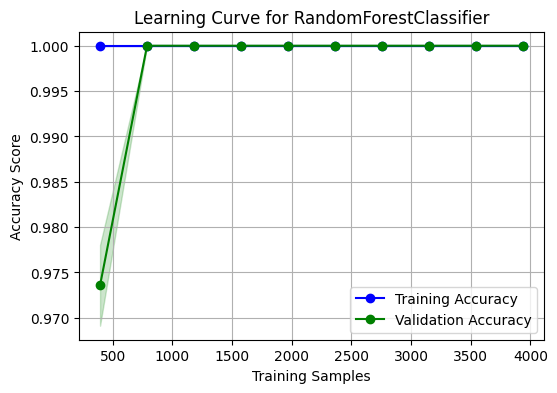

In [72]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="green", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")

# Labels and title
plt.xlabel("Training Samples")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for RandomForestClassifier")
plt.legend()
plt.grid()
plt.show()

In [21]:
import pandas as pd

# Load both CSV files
csv1 = pd.read_csv("/content/transformed_test.csv")  # Update with actual path
csv2 = pd.read_csv("/content/Training.csv")  # Update with actual path

# Ensure both dataframes have the same column order and remove duplicates
csv1 = csv1.sort_index(axis=1).drop_duplicates()
csv2 = csv2.sort_index(axis=1).drop_duplicates()

# Find matching rows by performing an inner merge without duplicates
matching_rows = csv1.merge(csv2, how='inner').drop_duplicates()

# Count the number of unique identical rows
num_matching_rows = matching_rows.shape[0]

# Print the number of matching rows
print(f"Number of unique matching rows: {num_matching_rows}")


Number of unique matching rows: 70


XGB CLASSIFIER

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Load datasets
train_df = pd.read_csv("/content/Training.csv")  # Update with actual path
test_df = pd.read_csv("/content/transformed_test.csv")  # Update with actual path

# Extract features and target variable
X_train = train_df.drop(columns=['prognosis'])  # Features
y_train = train_df['prognosis']  # Target
X_test = test_df.drop(columns=['prognosis'])
y_test = test_df['prognosis']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the training data and transform both train and test labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the model using the encoded labels
model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=10, random_state=42)
model.fit(X_train, y_train_encoded) # Pass the encoded y_train

# Make predictions using the encoded labels
y_pred_encoded = model.predict(X_test)

# Inverse transform the predictions to get original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model using the original labels
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Accuracy: 0.6207
Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00       120
                                   AIDS       0.37      1.00      0.54       120
                                   Acne       0.95      1.00      0.98       120
                    Alcoholic hepatitis       0.95      1.00      0.98       120
                                Allergy       0.51      1.00      0.68       120
                              Arthritis       1.00      1.00      1.00       120
                       Bronchial Asthma       0.26      0.30      0.28       120
                   Cervical spondylosis       1.00      1.00      1.00       120
                            Chicken pox       0.00      0.00      0.00       120
                    Chronic cholestasis       0.56      1.00      0.71       120
                            Common Cold       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


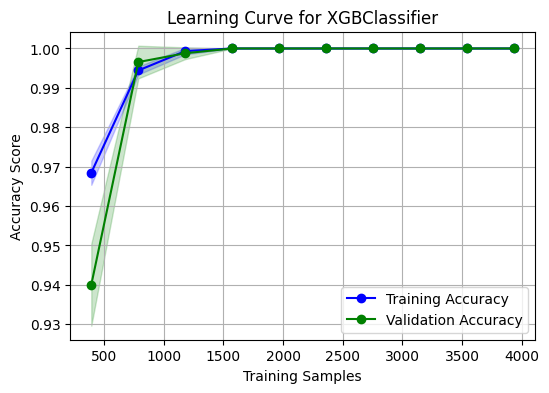

In [71]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    XGBClassifier(n_estimators=100, random_state=42),
    X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="green", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")

# Labels and title
plt.xlabel("Training Samples")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for XGBClassifier")
plt.legend()
plt.grid()
plt.show()

DEEP LEARNING USING TENSORFLOW -50 epochs

In [61]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
train_df = pd.read_csv("/content/Training.csv")  # Update with actual path
test_df = pd.read_csv("/content/transformed_test.csv")  # Update with actual path
# Extract features and target variable
X_train = train_df.drop(columns=['prognosis'])  # Features
y_train = train_df['prognosis']  # Target
X_test = test_df.drop(columns=['prognosis'])
y_test = test_df['prognosis']

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Convert labels to categorical
num_classes = len(encoder.classes_)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Build Deep Learning Model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history =model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
report = classification_report(y_test_labels, y_pred_labels, target_names=encoder.classes_)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


308/308 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6700 - loss: 1.6143 - val_accuracy: 0.7329 - val_loss: 1.2963
Epoch 2/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.7159 - val_loss: 1.2921
Epoch 3/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.7146 - val_loss: 1.3340
Epoch 4/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 6.2140e-04 - val_accuracy: 0.7146 - val_loss: 1.3622
Epoch 5/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 1.0000 - loss: 3.2549e-04 - val_accuracy: 0.7134 - val_loss: 1.3840
Epoch 6/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 2.4609e-04 - val_accuracy: 0.7134 - val_loss: 1.4023
Epoch 7/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 1.5959e-04 - val_accuracy: 0.7134 - val_loss: 1.4333
Epoch 8/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 1.1366e-04 - val_a

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


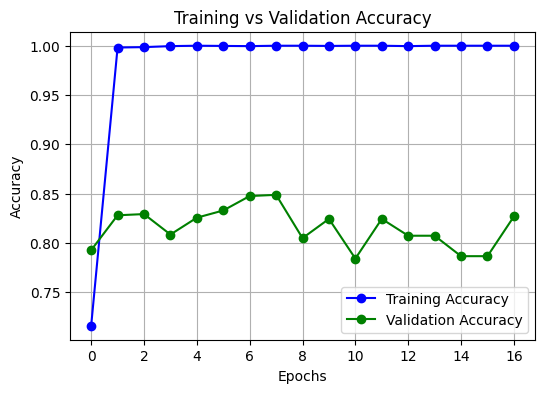

In [70]:
# Plot accuracy curve
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label="Training Accuracy", color='blue', marker="o")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", color='green', marker="o")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()


DEEP LEARNING USING TENSORFLOW -100 epochs

In [65]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
train_df = pd.read_csv("/content/Training.csv")  # Update with actual path
test_df = pd.read_csv("/content/transformed_test.csv")  # Update with actual path
new_data_df = pd.read_csv("/content/new_data3.csv")  # Load new dataset

# Extract features and target variable
X_train = train_df.drop(columns=['prognosis'])  # Features
y_train = train_df['prognosis']  # Target
X_test = test_df.drop(columns=['prognosis'])
y_test = test_df['prognosis']

# Standardize features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Convert labels to categorical
num_classes = len(encoder.classes_)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Build Improved Deep Learning Model
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile model with learning rate scheduler
optimizer = keras.optimizers.AdamW(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



# Early stopping & learning rate scheduler
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train model
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

# Evaluate model
y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
report = classification_report(y_test_labels, y_pred_labels, target_names=encoder.classes_)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

model.save("/content/disease_model.h5")
import joblib
joblib.dump(scaler, "/content/scaler.pkl")
joblib.dump(encoder, "/content/encoder.pkl")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4114 - loss: 2.6056 - val_accuracy: 0.7927 - val_loss: 0.7049 - learning_rate: 0.0010
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9971 - loss: 0.0495 - val_accuracy: 0.8280 - val_loss: 0.5982 - learning_rate: 0.0010
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9977 - loss: 0.0157 - val_accuracy: 0.8293 - val_loss: 0.5889 - learning_rate: 0.0010
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9999 - loss: 0.0089 - val_accuracy: 0.8085 - val_loss: 0.5469 - learning_rate: 0.0010
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.8256 - val_loss: 0.5844 - learning_rate: 0.0010
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9996 - loss: 0.0033 - val_accuracy: 0.8329 - val_loss: 0.5638 - learning_rate: 0.0010
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9999 - loss: 0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8476
Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00       120
                                   AIDS       1.00      1.00      1.00       120
                                   Acne       1.00      1.00      1.00       120
                    Alcoholic hepatitis       1.00      1.00      1.00       120
                                Allergy       0.91      1.00      0.95       120
                              Arthritis       1.00      1.00      1.00       120
                       Bronchial Asthma       0.83      1.00      0.91       120
                   Cervical spondylosis       1.00      1.00      1.00       120
                            Chicken pox       1.00      0.95      0.97       120
                    Chronic cholestasis       1.00      1.00      1.00       120
                            Common Cold       1.00      0.80      0.

['/content/encoder.pkl']

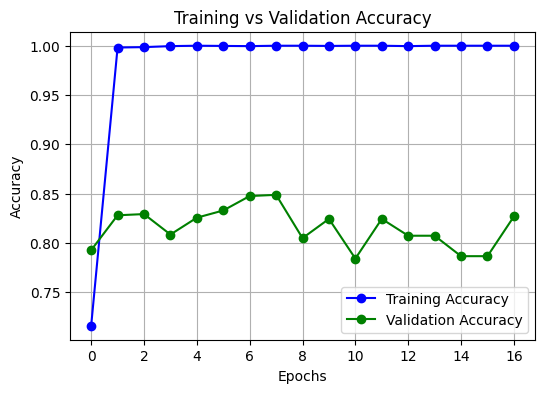

In [69]:
# Plot accuracy curve
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label="Training Accuracy", color='blue', marker="o")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", color='green', marker="o")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()


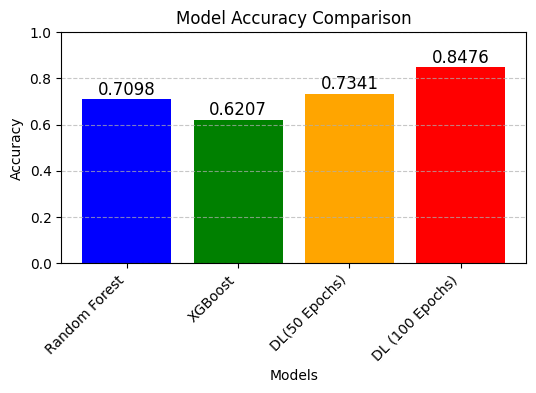

In [76]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['Random Forest', 'XGBoost', 'DL(50 Epochs)', 'DL (100 Epochs)']
accuracies = [0.7098, 0.6207, 0.7341, 0.8476]

# Plot bar chart
plt.figure(figsize=(6,3))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')


# Display accuracy values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.4f}", ha='center', fontsize=12)

plt.show()


PREDICTING OUTPUT


In [29]:

# Function to get disease details
def get_disease_details(predicted_disease):
    matched_data = new_data_df[new_data_df['Disease'] == predicted_disease]
    if matched_data.empty:
        return "No additional details available."
    return matched_data.iloc[0].to_dict()

# Function to take user input and predict disease
def predict_disease_from_symptoms():
    print("Enter symptoms one by one (type 'done' when finished):")
    user_symptoms = []
    while True:
        symptom = input("> ").strip().lower()
        if symptom == "done":
            break
        user_symptoms.append(symptom)

    symptom_columns = list(train_df.drop(columns=['prognosis']).columns)
    user_input = np.zeros(len(symptom_columns))
    for symptom in user_symptoms:
        if symptom in symptom_columns:
            user_input[symptom_columns.index(symptom)] = 1

    user_input_scaled = scaler.transform([user_input])
    prediction_probs = model.predict(user_input_scaled)[0]
    top_3_indices = prediction_probs.argsort()[-3:][::-1]
    top_3_diseases = encoder.inverse_transform(top_3_indices)
    top_3_confidences = prediction_probs[top_3_indices]

    print("\n🔎 **Top 3 Predicted Diseases:**")
    for disease, confidence in zip(top_3_diseases, top_3_confidences):
        print(f"{disease}: {confidence:.2f}")
        details = get_disease_details(disease)
        print("📌 **Additional Details:**")
        if isinstance(details, dict):
            for key, value in details.items():
                print(f"  - {key}: {value}")
        else:
            print(details)  # If no details found

# Run the prediction function
predict_disease_from_symptoms()

Enter symptoms one by one (type 'done' when finished):
> skin_rash
> irritation
> nodal_skin_eruptions
> done
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

🔎 **Top 3 Predicted Diseases:**
Fungal infection: 0.98
📌 **Additional Details:**
  - Disease: Fungal infection
  - description: Fungal infection is a common skin condition caused by fungi.
  - medication: ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
  - diet: ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']
  - Precaution_1: bath twice
  - Precaution_2: use detol or neem in bathing water
  - Precaution_3: keep infected area dry
  - Precaution_4: use clean cloths
  - Grouped_Workout_Advice: Avoid sugary foods, Consume probiotics, Increase intake of garlic, Include yogurt in diet, Limit processed foods, Stay hydrated, Consume green tea, Eat foods rich in zinc, Include turmeric in diet, Eat fruits and vegetables
Impetigo: 0.01
📌 **Additional Details:**
  - Disease: Impetigo
  - descr

In [30]:
!pip install gradio
import numpy as np
import tensorflow as tf
import pickle
import gradio as gr
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load trained model
# Load trained model
model = tf.keras.models.load_model("/content/disease_model.h5",compile=True)

# Fix: Compile the model after loading to build the missing metrics
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Save the trained model
model.save("model.h5", save_format="h5")


# Load Label Encoder safely
try:
    with open("/content/encoder.pkl", "rb") as f:
        encoder = pickle.load(f)
    if not isinstance(encoder, LabelEncoder) or not hasattr(encoder, "classes_"):
        print("⚠️ Warning: `encoder.pkl` is not valid. Re-fitting now.")
        encoder = LabelEncoder()
except:
    print("⚠️ Warning: Failed to load `encoder.pkl`. Creating a new LabelEncoder.")
    encoder = LabelEncoder()

# Load dataset
train_df = pd.read_csv("/content/Training.csv")

# Identify disease column
for col in train_df.columns:
    if col.strip().lower() == "prognosis":
        disease_col = col
        break
else:
    raise ValueError("⚠️ Error: 'Disease' column not found in Training.csv. Please check column names.")

# Fit LabelEncoder
encoder.fit(train_df[disease_col])

# Save corrected encoder
with open("/content/encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

# Load MinMaxScaler safely
try:
    with open("/content/scaler.pkl", "rb") as f:
        scaler = pickle.load(f)
    if not isinstance(scaler, MinMaxScaler) or not hasattr(scaler, "data_min_"):
        print("⚠️ Warning: `scaler.pkl` is invalid. Re-fitting now.")
        scaler = MinMaxScaler()
except:
    print("⚠️ Warning: Failed to load `scaler.pkl`. Creating a new MinMaxScaler.")
    scaler = MinMaxScaler()

# Fit scaler if necessary
X_train = train_df.iloc[:, :-1].values
if not hasattr(scaler, "data_min_"):
    print("🔄 Fitting MinMaxScaler on training data...")
    scaler.fit(X_train)

# Save the fitted scaler
with open("/content/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Load additional disease information
data_df = pd.read_csv("/content/new_data3.csv")

# Get symptom columns
symptom_columns = train_df.columns[:-1]

def transform_input(user_symptoms):
    input_vector = np.zeros(len(symptom_columns))
    for i, col in enumerate(symptom_columns):
        if col.lower() in user_symptoms:
            input_vector[i] = 1
    return scaler.transform([input_vector])

def get_disease_info(disease_name):
    details = data_df[data_df['Disease'] == disease_name].iloc[0] if not data_df[data_df['Disease'] == disease_name].empty else None

    return {
        "description": details["description"] if details is not None else "No description available.",
        "medication": eval(details["medication"]) if details is not None else [],
        "diet": eval(details["diet"]) if details is not None else [],
        "precautions": [details["Precaution_1"], details["Precaution_2"], details["Precaution_3"], details["Precaution_4"]] if details is not None else [],
        "workout_advice": details["Grouped_Workout_Advice"] if details is not None else "No advice available."
    }

def get_top_diseases(symptoms):
    input_data = transform_input(symptoms)
    prediction_probs = model.predict(input_data)[0]
    top_3_indices = prediction_probs.argsort()[-3:][::-1]
    top_3_diseases = encoder.inverse_transform(top_3_indices)
    top_3_probs = prediction_probs[top_3_indices]
    return list(zip(top_3_diseases, top_3_probs))

def chatbot_response(user_input):
    try:
        symptoms = [sym.strip().lower() for sym in user_input.split(",")]
        predictions = get_top_diseases(symptoms)
        response = "🔎 **Predicted Diseases:**\n\n"
        for disease, prob in predictions:
            info = get_disease_info(disease)
            response += f"🔹 **{disease}** ({prob:.2f} confidence)\n"
            response += f"📌 **Description:** {info['description']}\n"
            response += f"💊 **Medications:** {', '.join(info['medication'])}\n"
            response += f"🥗 **Recommended Diet:** {', '.join(info['diet'])}\n"
            response += f"⚠️ **Precautions:** {', '.join(info['precautions'])}\n"
            response += f"🏋 **Workout Advice:** {info['workout_advice']}\n\n"
        return response
    except Exception as e:
        return f"⚠️ Error: {str(e)}"

iface = gr.Interface(fn=chatbot_response, inputs="text", outputs="text",
                     title="Disease Prediction Chatbot",
                     description="Enter symptoms separated by commas (e.g., fever, headache, nausea) to get disease predictions.")

iface.launch(share=True, debug=True)



Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://72a57c02cc4116baa1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://72a57c02cc4116baa1.gradio.live


In [31]:
ui_code ="""import numpy as np
import tensorflow as tf
import pickle
import gradio as gr
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load trained model
# Load trained model
model = tf.keras.models.load_model("/content/disease_model.h5",compile=True)

# Fix: Compile the model after loading to build the missing metrics
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Save the trained model
model.save("model.h5", save_format="h5")


# Load Label Encoder safely
try:
    with open("/content/encoder.pkl", "rb") as f:
        encoder = pickle.load(f)
    if not isinstance(encoder, LabelEncoder) or not hasattr(encoder, "classes_"):
        print("⚠️ Warning: `encoder.pkl` is not valid. Re-fitting now.")
        encoder = LabelEncoder()
except:
    print("⚠️ Warning: Failed to load `encoder.pkl`. Creating a new LabelEncoder.")
    encoder = LabelEncoder()

# Load dataset
train_df = pd.read_csv("/content/Training.csv")

# Identify disease column
for col in train_df.columns:
    if col.strip().lower() == "prognosis":
        disease_col = col
        break
else:
    raise ValueError("⚠️ Error: 'Disease' column not found in Training.csv. Please check column names.")

# Fit LabelEncoder
encoder.fit(train_df[disease_col])

# Save corrected encoder
with open("/content/encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

# Load MinMaxScaler safely
try:
    with open("/content/scaler.pkl", "rb") as f:
        scaler = pickle.load(f)
    if not isinstance(scaler, MinMaxScaler) or not hasattr(scaler, "data_min_"):
        print("⚠️ Warning: `scaler.pkl` is invalid. Re-fitting now.")
        scaler = MinMaxScaler()
except:
    print("⚠️ Warning: Failed to load `scaler.pkl`. Creating a new MinMaxScaler.")
    scaler = MinMaxScaler()

# Fit scaler if necessary
X_train = train_df.iloc[:, :-1].values
if not hasattr(scaler, "data_min_"):
    print("🔄 Fitting MinMaxScaler on training data...")
    scaler.fit(X_train)

# Save the fitted scaler
with open("/content/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Load additional disease information
data_df = pd.read_csv("/content/new_data3.csv")

# Get symptom columns
symptom_columns = train_df.columns[:-1]

def transform_input(user_symptoms):
    input_vector = np.zeros(len(symptom_columns))
    for i, col in enumerate(symptom_columns):
        if col.lower() in user_symptoms:
            input_vector[i] = 1
    return scaler.transform([input_vector])

def get_disease_info(disease_name):
    details = data_df[data_df['Disease'] == disease_name].iloc[0] if not data_df[data_df['Disease'] == disease_name].empty else None

    return {
        "description": details["description"] if details is not None else "No description available.",
        "medication": eval(details["medication"]) if details is not None else [],
        "diet": eval(details["diet"]) if details is not None else [],
        "precautions": [details["Precaution_1"], details["Precaution_2"], details["Precaution_3"], details["Precaution_4"]] if details is not None else [],
        "workout_advice": details["Grouped_Workout_Advice"] if details is not None else "No advice available."
    }

def get_top_diseases(symptoms):
    input_data = transform_input(symptoms)
    prediction_probs = model.predict(input_data)[0]
    top_3_indices = prediction_probs.argsort()[-3:][::-1]
    top_3_diseases = encoder.inverse_transform(top_3_indices)
    top_3_probs = prediction_probs[top_3_indices]
    return list(zip(top_3_diseases, top_3_probs))

def chatbot_response(user_input):
    try:
        symptoms = [sym.strip().lower() for sym in user_input.split(",")]
        predictions = get_top_diseases(symptoms)
        response = "🔎 **Predicted Diseases:**\n\n"
        for disease, prob in predictions:
            info = get_disease_info(disease)
            response += f"🔹 **{disease}** ({prob:.2f} confidence)\n"
            response += f"📌 **Description:** {info['description']}\n"
            response += f"💊 **Medications:** {', '.join(info['medication'])}\n"
            response += f"🥗 **Recommended Diet:** {', '.join(info['diet'])}\n"
            response += f"⚠️ **Precautions:** {', '.join(info['precautions'])}\n"
            response += f"🏋 **Workout Advice:** {info['workout_advice']}\n\n"
        return response
    except Exception as e:
        return f"⚠️ Error: {str(e)}"

iface = gr.Interface(fn=chatbot_response, inputs="text", outputs="text",
                     title="Disease Prediction Chatbot",
                     description="Enter symptoms separated by commas (e.g., fever, headache, nausea) to get disease predictions.")

iface.launch(share=True, debug=True)"""

# Save to app.py
with open("app.py", "w") as f:
    f.write(ui_code)

print("✅ app.py saved successfully!")

✅ app.py saved successfully!
